# Bias Variance Data Tradeoff

In [1]:
import itertools
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from mlxtend.evaluate import bias_variance_decomp
from sklearn.linear_model import LinearRegression

# Generate data

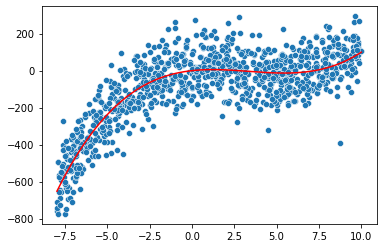

In [2]:
X = np.random.uniform(-8, 10, 1000)
noise = np.random.normal(0,100,1000)
# true function f(x) = 10x - 5x^2 + 0.5x^3
true_function = 10*X -5*X**2 + 0.5*(X**3)
y=true_function+noise
sns.scatterplot(x=X, y=y)
sns.lineplot(x=X, y=true_function, color='r')
plt.show()

In [3]:
features = X
targets = y
#split the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

#first fit a simple linear regression
simple = LinearRegression()
simple.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

# estimate bias and variance
mse, bias, var = bias_variance_decomp(simple, X_train.reshape(-1,1),
                                      y_train, X_test.reshape(-1,1),
                                      y_test, loss='mse', num_rounds=2000, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)


MSE: 19684.387
Bias: 19612.568
Variance: 71.819


In [4]:
r_2 = simple.score(X_test.reshape(-1,1), y_test)
print(f'simple linear model R^2 = {r_2}')

simple linear model R^2 = 0.5126460627417537


In [5]:
def truncate_fit_eval_linear(num_obs):
    features = X[:num_obs]
    targets = y[:num_obs]
    #split the data into test and train sets
    X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.33, random_state=1)

    #first fit a simple linear regression
    simple = LinearRegression()
    simple.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

    # estimate bias and variance
    mse, bias, var = bias_variance_decomp(simple, X_train.reshape(-1,1),
                                      y_train, X_test.reshape(-1,1),
                                      y_test, loss='mse', num_rounds=2000, random_seed=1)
    
    r_2 = simple.score(X_test.reshape(-1,1), y_test)
    return {'MSE': mse, 'Bias': bias, 'Variance': var, 'r^2': r_2}

In [6]:
truncate_fit_eval_linear(100)

{'MSE': 17737.19153555979,
 'Bias': 17184.856032642318,
 'Variance': 552.3355029174769,
 'r^2': 0.46552754575353894}

In [7]:
ldf = pd.DataFrame({'num_obs': [None], 'MSE': [None], 'Bias': [None], 'Variance': [None], 'r^2': [None]})
ddict = {'num_obs': [], 'MSE': [], 'Bias': [], 'Variance': [], 'r^2': []}
obs_vector = np.arange(5,10000,10)
for num in obs_vector[5:50]:
    new_dict = truncate_fit_eval_linear(num)
    ddict['num_obs'].append(num)
    ddict['MSE'].append(new_dict['MSE'])
    ddict['Bias'].append(new_dict['Bias'])
    ddict['Variance'].append(new_dict['Variance'])
    ddict['r^2'].append(new_dict['r^2'])
    
        

In [8]:
#ttt = pd.DataFrame({'num_obs': [1,2], 'MSE': [3,4], 'Bias': [5,6], 'Variance': [7,8], 'r^2': [9,10]})
#ttt.append({'num_obs': 5, 'MSE': 5, 'Bias': 5, 'Variance': 800, 'r^2': 9000}, ignore_index=True)
results = pd.DataFrame(ddict)

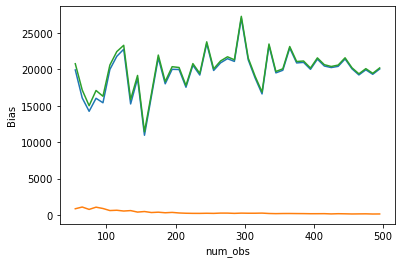

In [9]:
results.head(5)
sns.lineplot(x='num_obs', y='Bias', data=results)
sns.lineplot(x='num_obs', y='Variance', data=results)
sns.lineplot(x='num_obs', y='MSE', data=results)
plt.show()

<AxesSubplot:xlabel='num_obs', ylabel='r^2'>

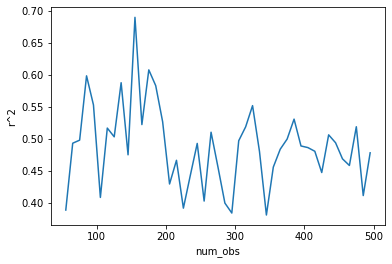

In [10]:
sns.lineplot(x='num_obs', y='r^2', data=results)

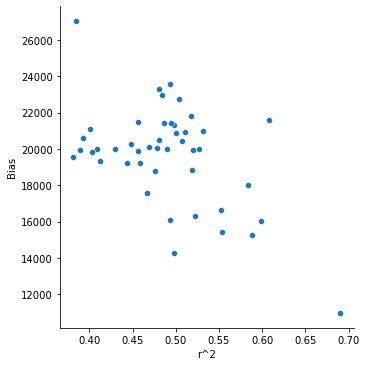

In [11]:
sns.relplot(x='r^2', y='Bias', data=results)

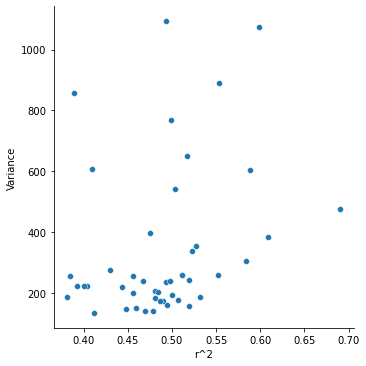

In [12]:
sns.relplot(x='r^2', y='Variance', data=results)

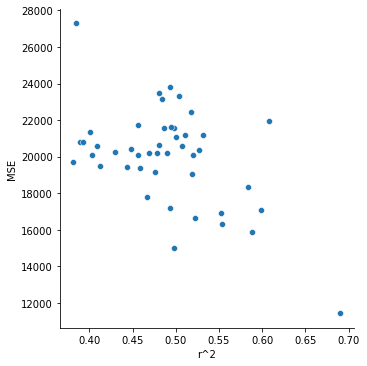

In [13]:
sns.relplot(x='r^2', y='MSE', data=results)